#### Dedução do modelo treinado

Nessa etapa é carregado o modelo treinado, pega uma imagem aleatória, faz a predição e destaca os produtos detectados. É utilizado a bibliotexa *supervision* para organizar as predições e exibir a imagem com as detecções.


In [1]:
import cv2
import glob
import torch
import numpy as np
import supervision as sv
from super_gradients.training import models

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CLASSES = ['product']
CLASSES += [str(i) for i in range(80 - len(CLASSES))]

best_model = models.get( "yolo_nas_s",
    num_classes=len(CLASSES),
    checkpoint_path=f"./weights/SKU110K/RUN_20241215_173503_278811/average_model.pth"
).to(DEVICE)

In [7]:
images = glob.glob("SKU110K_fixed/images/test/*")

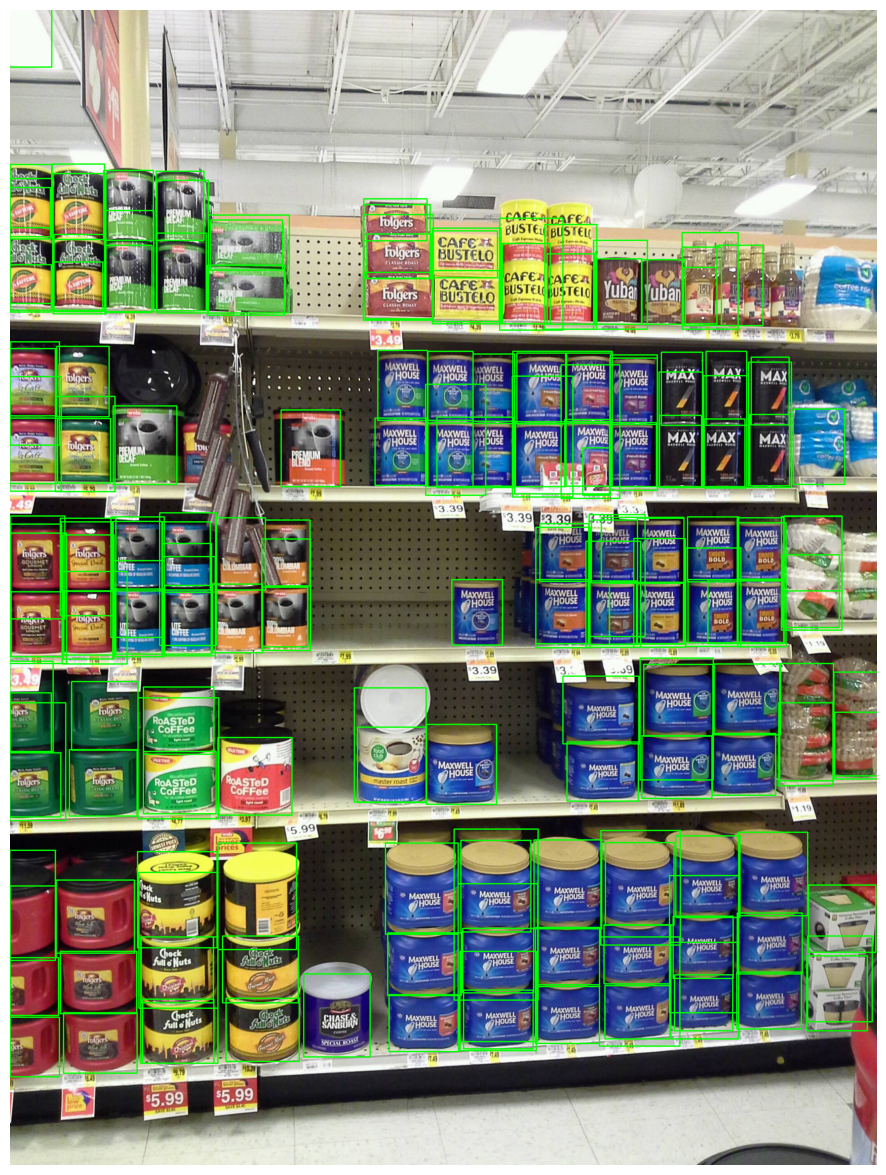

In [8]:
image = cv2.imread(np.random.choice(images))
result = best_model.predict(image, conf=0.1) #Ajustar o conf para valores maiores pode reduzir os falsos positivos

detections = sv.Detections(
    xyxy=result.prediction.bboxes_xyxy,
    confidence=result.prediction.confidence,
    class_id=result.prediction.labels.astype(int)
)

box_annotator = sv.BoxAnnotator(color=sv.Color(0, 255, 0))
annotated_frame = box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    # skip_label=True
)

%matplotlib inline
sv.plot_image(annotated_frame, (15, 15))

> **OBS:** Como o modelo foi treinado só por 5 épocas, ele ainda tá meio "inexperiente", então, o modelo não está tão certeiro nas predições. Por isso, fez sentido baixar o nível de confiança pra 0.1, já que assim a gente garante que ele pegue mais coisas nas pratileiras (mesmo que algumas não sejam tão confiáveis). Um nível de confiança baixo também aumenta a chance de ele marcar coisas erradas. Se o modelo fosse mais bem treinado, com mais épocas, dava pra usar uma confiança maior, como 0.5 ou 0.7.
